In [1]:
import pandas as pd
import numpy as np
import mygene as mygene
import matplotlib.pyplot as plt
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats
from pydeseq2.utils import load_example_data

## Data Preprocessing

In [20]:
df = pd.read_csv('SRP158491/SRP158491.tsv', sep='\t')

In [22]:
mg = mygene.MyGeneInfo()
query_result = mg.querymany(df['Gene'].tolist(), scopes='ensembl.gene',
                           fields='symbol', species='human')
ensembl_to_hugo = {item['query']: item.get('symbol', '') for item in query_result}
df['Gene'] = df['Gene'].map(ensembl_to_hugo)
df.to_csv('SRP158491_converted.tsv', sep='\t', index=False)

6 input query terms found dup hits:	[('ENSG00000188660', 2), ('ENSG00000249738', 2), ('ENSG00000268674', 3), ('ENSG00000273730', 10), ('
447 input query terms found no hit:	['ENSG00000112096', 'ENSG00000116883', 'ENSG00000130489', 'ENSG00000130723', 'ENSG00000137808', 'ENS


In [2]:
df = pd.read_csv('SRP158491_converted.tsv', sep='\t')

In [3]:
### HUgo Values not matching Ensemble IDs so dropping NAN Values
df = df.dropna()

In [ ]:
df = df.drop_duplicates(subset='Gene', keep='first')

In [4]:
df

,Gene,SRR7725764,SRR7725765,SRR7725767,SRR7725768,SRR7725770,SRR7725772,SRR7725773,SRR7725774,SRR7725775,...,SRR7726082,SRR7726083,SRR7726089,SRR7726092,SRR7726094,SRR7726095,SRR7726096,SRR7726097,SRR7726098,SRR7726099
0,TSPAN6,3.136188,5.375076,0.291745,0.258578,6.014666,4.883872,21.46048,3.386398,0.000000,...,13.731706,1.645844,3.188051,17.539990,2.125112,14.213586,8.422800,0.00000,1.620008,14.032206
1,TNMD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.768578,0.000000
2,DPM1,68.181700,131.896120,34.899677,562.589700,140.499310,323.004700,464.93018,416.068080,337.545700,...,387.810150,421.635700,323.789670,301.299040,402.624940,422.879670,442.268550,404.41415,556.072940,139.260510
3,SCYL3,77.735520,42.363340,48.085857,110.548100,52.349422,120.034096,145.88985,128.955440,90.929340,...,169.642030,114.807370,85.415245,87.620575,117.897720,160.923280,131.868960,103.09869,96.676780,49.404740
4,FIRRM,18.562527,23.658604,15.999660,32.007370,18.406652,38.122380,38.92119,32.574413,43.490807,...,53.578606,53.470234,64.275110,28.295240,56.696815,46.024033,29.202042,38.10093,36.457996,16.427351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43318,LOC128092249,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
43330,ARMCX5-GPRASP2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.944950,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
43336,LOC112268419,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
43348,LOC124903324,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000


In [80]:
### Need To Log-Scale Values For Plot of Medians
test = df.copy()
test.iloc[:, 1:] = np.log1p(df.iloc[:, 1:])

In [74]:
median_expression = test.iloc[:, 1:].median(axis=1)

(array([1.9811e+04, 1.3000e+01, 2.9000e+01, 3.9000e+01, 3.9000e+01,
        8.1000e+01, 3.9200e+02, 2.3700e+02, 9.1000e+01, 7.2000e+01,
        2.2300e+02, 1.8600e+02, 1.0900e+02, 1.5000e+02, 1.3200e+02,
        1.3200e+02, 1.2800e+02, 1.3000e+02, 1.5000e+02, 1.5400e+02,
        1.2300e+02, 1.1800e+02, 1.1700e+02, 1.3800e+02, 1.2800e+02,
        1.3200e+02, 1.6000e+02, 1.4300e+02, 1.7300e+02, 1.6100e+02,
        1.6100e+02, 1.7700e+02, 1.8100e+02, 1.8200e+02, 2.0900e+02,
        2.3700e+02, 2.3000e+02, 2.1800e+02, 2.4500e+02, 2.2400e+02,
        2.2400e+02, 2.6800e+02, 2.3600e+02, 2.3800e+02, 2.8200e+02,
        2.6500e+02, 2.8000e+02, 2.6500e+02, 2.7500e+02, 2.4600e+02,
        2.8000e+02, 2.5200e+02, 2.9400e+02, 2.7800e+02, 2.2900e+02,
        2.3600e+02, 2.6200e+02, 2.1800e+02, 2.0100e+02, 1.8300e+02,
        2.0700e+02, 1.8000e+02, 1.7200e+02, 1.5900e+02, 1.3400e+02,
        1.3000e+02, 8.7000e+01, 7.6000e+01, 7.9000e+01, 8.2000e+01,
        6.1000e+01, 6.7000e+01, 5.7000e+01, 4.20

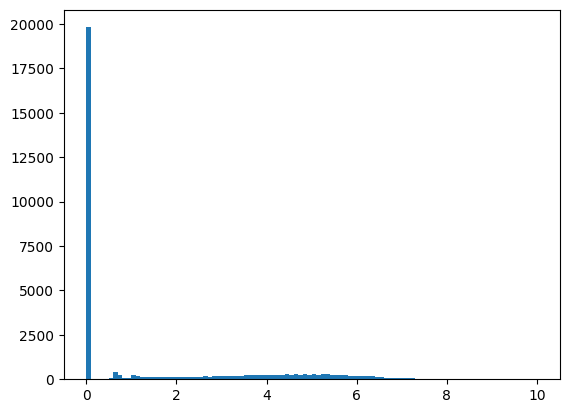

In [85]:
plt.hist(median_expression.clip(0, 10), bins=100)

## Step 2

In [6]:
### Step 2
import json

In [28]:
with open('aggregated_metadata.json') as file:
    data = json.load(file)


## Getting Dataframes for Each group according to metadata

In [86]:
### Create Healthy and Rheumatoid Dataframes
healthy_indices = ['Gene']
rheumatoid_indices = ['Gene']
ifx_indices = ['Gene']
mtx_indices = ['Gene']
non_indices = ['Gene']
tcz_indices = ['Gene']
synovial_indices = ['Gene']
for column in df.columns:
    if(column == 'Gene'):
        continue
    elif data['samples'][column]['refinebio_disease'] == 'healthy':
        healthy_indices.append(column)
    elif data['samples'][column]['refinebio_disease'] == 'ra ifx treatment':
        rheumatoid_indices.append(column)
        ifx_indices.append(column)
    elif data['samples'][column]['refinebio_disease'] == 'ra mtx treatment':
        rheumatoid_indices.append(column)
        mtx_indices.append(column)
    elif data['samples'][column]['refinebio_disease'] == 'ra non treatment':
        rheumatoid_indices.append(column)
        non_indices.append(column)
    elif data['samples'][column]['refinebio_disease'] == 'ra tcz treatment':
        rheumatoid_indices.append(column)
        tcz_indices.append(column)
    else:
        rheumatoid_indices.append(column)
        synovial_indices.append(column)

In [87]:
print(len(healthy_indices))
print(len(rheumatoid_indices))
print(len(ifx_indices))
print(len(mtx_indices))
print(len(non_indices))
print(len(tcz_indices))
print(len(synovial_indices))

63
215
55
49
58
47
10


In [29]:
len(rheumatoid_indices)

215

In [88]:
healthy_df = test[healthy_indices]
rheumatoid_df = test[rheumatoid_indices]
ifx_df = test[ifx_indices]
mtx_df = test[mtx_indices]
non_df = test[non_indices]
tcz_df = test[tcz_indices]
synovial_df = test[synovial_indices]

In [89]:
rheumatoid_df

,Gene,SRR7725833,SRR7725834,SRR7725835,SRR7725836,SRR7725837,SRR7725838,SRR7725841,SRR7725842,SRR7725843,...,SRR7726082,SRR7726083,SRR7726089,SRR7726092,SRR7726094,SRR7726095,SRR7726096,SRR7726097,SRR7726098,SRR7726099
0,TSPAN6,2.382957,0.233442,3.457217,1.871166,0.488436,2.445236,2.281587,0.000000,0.877748,...,2.690002,0.972990,1.432236,2.919930,1.139470,2.722189,2.243132,0.000000,0.963177,2.710195
1,TNMD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.570176,0.000000
2,DPM1,5.487779,5.550531,5.496561,5.243877,2.445244,4.957591,5.883984,6.156345,5.896875,...,5.963091,6.046511,5.783178,5.711417,6.000486,6.049450,6.094176,6.004909,6.322696,4.943501
3,SCYL3,4.515617,3.980853,4.015447,3.667109,2.223991,3.668026,4.500932,4.773943,4.737823,...,5.139568,4.751928,4.459164,4.484364,4.778264,5.087123,4.889363,4.645339,4.581664,3.920085
4,FIRRM,4.027941,3.849665,3.217186,3.766064,2.847837,3.163431,3.010587,3.184986,3.856301,...,3.999642,3.997654,4.178611,3.377425,4.055202,3.850659,3.407910,3.666146,3.623220,2.858041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43318,LOC128092249,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
43330,ARMCX5-GPRASP2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.665236,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
43336,LOC112268419,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
43348,LOC124903324,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [70]:
synovial_df

,Gene,SRR7726022,SRR7726023,SRR7726024,SRR7726026,SRR7726027,SRR7726028,SRR7726030,SRR7726031,SRR7726032
0,TSPAN6,0.286624,0.274994,0.238777,1.453799,2.577544,1.499207,1.971568,0.290978,0.284671
1,TNMD,0.286624,0.274994,1.774773,0.264557,0.283119,0.272237,0.301445,0.290978,0.284671
2,DPM1,6.066882,4.097133,3.961171,4.837608,6.351054,5.008258,6.552148,9.178756,7.176307
3,SCYL3,3.592525,3.260171,3.465683,3.050830,3.567875,2.983301,3.166990,3.388550,3.565516
4,FIRRM,3.427381,3.775757,2.923236,3.296656,2.969801,3.620965,3.063760,3.018113,3.456971
...,...,...,...,...,...,...,...,...,...,...
43318,LOC128092249,0.286624,0.274994,0.238777,0.264557,0.283119,0.272237,0.301445,0.290978,0.284671
43330,ARMCX5-GPRASP2,0.286624,0.274994,0.238777,0.264557,0.283119,0.272237,0.301445,0.290978,0.284671
43336,LOC112268419,0.286624,0.274994,0.238777,0.264557,0.283119,0.272237,0.301445,0.290978,0.284671
43348,LOC124903324,0.286624,0.274994,0.238777,0.264557,0.283119,1.534483,0.301445,0.290978,0.284671


In [34]:
from sklearn.decomposition import PCA

In [90]:
pca = PCA(n_components=2)
pca.fit(test.iloc[:, 1:].transpose())

PCA(n_components=2)

In [36]:
len(pca.components_[0])

32636

In [91]:
rheumatoid_df = test[rheumatoid_indices]
ifx_df = test[ifx_indices]
mtx_df = test[mtx_indices]
non_df = test[non_indices]
tcz_df = test[tcz_indices]
synovial_df = test[synovial_indices]

In [92]:
healthy_pca = pca.transform(healthy_df.iloc[:, 1:].transpose())
rheumatoid_pca = pca.transform(rheumatoid_df.iloc[:, 1:].transpose())
ifx_pca = pca.transform(ifx_df.iloc[:, 1:].transpose())
mtx_pca = pca.transform(mtx_df.iloc[:, 1:].transpose())
non_pca = pca.transform(non_df.iloc[:, 1:].transpose())
tcz_pca = pca.transform(tcz_df.iloc[:, 1:].transpose())
synovial_pca = pca.transform(synovial_df.iloc[:, 1:].transpose())

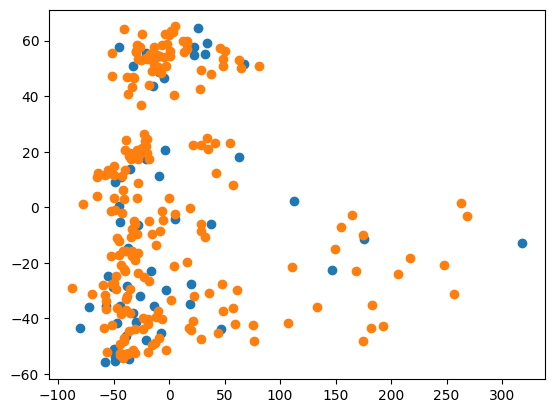

In [93]:
plt.scatter(healthy_pca[:, 0], healthy_pca[:, 1])
plt.scatter(rheumatoid_pca[:, 0], rheumatoid_pca[:, 1])

In [40]:
test = df

## Healthy Non-Treatment PCA

Text(0, 0.5, 'Principal Component 2')

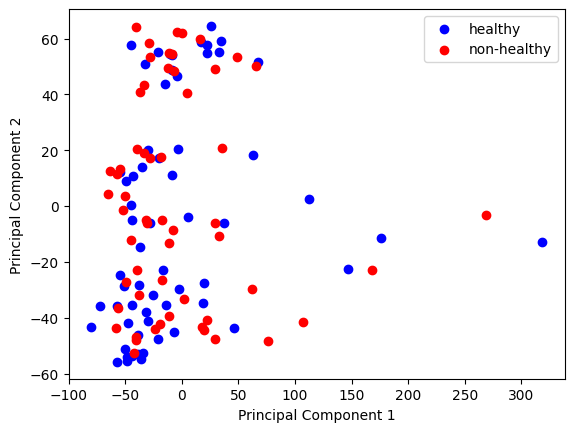

In [94]:
plt.scatter(healthy_pca[:, 0], healthy_pca[:, 1], c='blue', label='healthy')
plt.scatter(non_pca[:, 0], non_pca[:, 1], c='red', label='non-healthy')
plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

## All treatments PCA

In [95]:
rheumatoid_df = test[rheumatoid_indices]
ifx_df = test[ifx_indices]
mtx_df = test[mtx_indices]
non_df = test[non_indices]
tcz_df = test[tcz_indices]
synovial_df = test[synovial_indices]

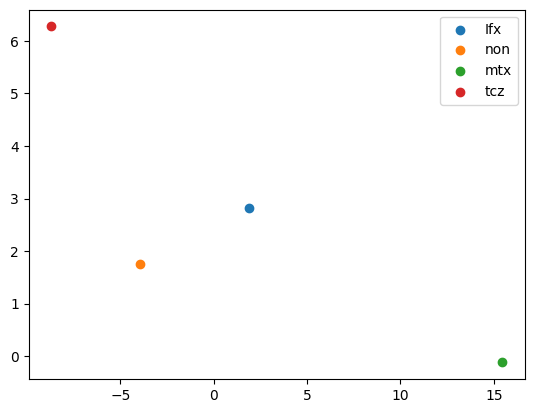

In [96]:
plt.scatter(np.mean(ifx_pca[:, 0]), np.mean(ifx_pca[:, 1]), label='Ifx')
plt.scatter(np.mean(non_pca[:, 0]), np.mean(non_pca[:, 1]), label='non')
plt.scatter(np.mean(mtx_pca[:, 0]), np.mean(mtx_pca[:, 1]), label='mtx')
plt.scatter(np.mean(tcz_pca[:, 0]), np.mean(tcz_pca[:, 1]), label='tcz')
plt.legend()

## T-SNE Boogaloo

In [82]:
from sklearn.manifold import TSNE

## DESeq Boogaloo

In [26]:
metadata_df = pd.read_csv('SRP158491/metadata_SRP158491.tsv', sep='\t')

In [27]:
metadata_df

,refinebio_accession_code,experiment_accession,refinebio_age,refinebio_cell_line,refinebio_compound,refinebio_developmental_stage,refinebio_disease,refinebio_disease_stage,refinebio_genetic_information,refinebio_organism,...,refinebio_processor_version,refinebio_race,refinebio_sex,refinebio_source_archive_url,refinebio_source_database,refinebio_specimen_part,refinebio_subject,refinebio_time,refinebio_title,refinebio_treatment
0,SRR7725764,SRP158491,53.0,NaN,NaN,NaN,healthy,NaN,NaN,HOMO_SAPIENS,...,v1.26.0-hotfix,NaN,male,NaN,SRA,blood,tcm cd4 cell,NaN,HC1__CD4-Tcm cells,NaN
1,SRR7725765,SRP158491,53.0,NaN,NaN,NaN,healthy,NaN,NaN,HOMO_SAPIENS,...,v1.26.0-hotfix,NaN,male,NaN,SRA,blood,tem cd4 cell,NaN,HC1__CD4-Tem cells,NaN
2,SRR7725767,SRP158491,53.0,NaN,NaN,NaN,healthy,NaN,NaN,HOMO_SAPIENS,...,v1.26.0-hotfix,NaN,male,NaN,SRA,blood,tcm cd8 cell,NaN,HC1__CD8-Tcm cells,NaN
3,SRR7725768,SRP158491,53.0,NaN,NaN,NaN,healthy,NaN,NaN,HOMO_SAPIENS,...,v1.26.0-hotfix,NaN,male,NaN,SRA,blood,tem cd8 cell,NaN,HC1__CD8-Tem cells,NaN
4,SRR7725770,SRP158491,53.0,NaN,NaN,NaN,healthy,NaN,NaN,HOMO_SAPIENS,...,v1.26.0-hotfix,NaN,male,NaN,SRA,blood,tn cd8 cell,NaN,HC1__CD8-Tn cells,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,SRR7726095,SRP158491,68.0,NaN,NaN,NaN,ra tcz treatment,NaN,NaN,HOMO_SAPIENS,...,v1.26.0-hotfix,NaN,female,NaN,SRA,blood,tn cd4 cell,NaN,RA_TCZ treated9__CD4-Tn cells,NaN
272,SRR7726096,SRP158491,68.0,NaN,NaN,NaN,ra tcz treatment,NaN,NaN,HOMO_SAPIENS,...,v1.26.0-hotfix,NaN,female,NaN,SRA,blood,tcm cd8 cell,NaN,RA_TCZ treated9__CD8-Tcm cells,NaN
273,SRR7726097,SRP158491,68.0,NaN,NaN,NaN,ra tcz treatment,NaN,NaN,HOMO_SAPIENS,...,v1.26.0-hotfix,NaN,female,NaN,SRA,blood,tem cd8 cell,NaN,RA_TCZ treated9__CD8-Tem cells,NaN
274,SRR7726098,SRP158491,68.0,NaN,NaN,NaN,ra tcz treatment,NaN,NaN,HOMO_SAPIENS,...,v1.26.0-hotfix,NaN,female,NaN,SRA,blood,temra cd8 cell,NaN,RA_TCZ treated9__CD8-Temra cells,NaN


In [29]:
len(metadata_df['refinebio_accession_code'].unique())

276

In [38]:
deseq_df = df.set_index('Gene')

In [39]:
deseq_df = deseq_df.round(0)

In [40]:
deseq_df = deseq_df.astype(int)

In [41]:
deseq_df

,SRR7725764,SRR7725765,SRR7725767,SRR7725768,SRR7725770,SRR7725772,SRR7725773,SRR7725774,SRR7725775,SRR7725776,...,SRR7726082,SRR7726083,SRR7726089,SRR7726092,SRR7726094,SRR7726095,SRR7726096,SRR7726097,SRR7726098,SRR7726099
Gene,,,,,,,,,,,,,,,,,,,,,
TSPAN6,3,5,0,0,6,5,21,3,0,0,...,14,2,3,18,2,14,8,0,2,14
TNMD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
DPM1,68,132,35,563,140,323,465,416,338,393,...,388,422,324,301,403,423,442,404,556,139
SCYL3,78,42,48,111,52,120,146,129,91,112,...,170,115,85,88,118,161,132,103,97,49
FIRRM,19,24,16,32,18,38,39,33,43,51,...,54,53,64,28,57,46,29,38,36,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LOC128092249,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ARMCX5-GPRASP2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
LOC112268419,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
deseq_df.transpose()

Gene,TSPAN6,TNMD,DPM1,SCYL3,FIRRM,FGR,CFH,FUCA2,GCLC,NFYA,...,LOC728392,CPLANE1-AS1,COPG2IT1,LINC00279,NOTCH2NLC,LOC128092249,ARMCX5-GPRASP2,LOC112268419,LOC124903324,LOC114841035
SRR7725764,3,0,68,78,19,3,4,44,256,208,...,115,0,0,0,385,0,0,0,0,0
SRR7725765,5,0,132,42,24,785,23,32,343,240,...,189,0,0,0,496,0,0,0,0,0
SRR7725767,0,0,35,48,16,6,8,4,186,109,...,49,0,0,0,211,0,0,0,0,0
SRR7725768,0,0,563,111,32,1069,79,55,316,411,...,350,0,0,0,792,0,0,0,0,0
SRR7725770,6,0,140,52,18,16,0,25,282,338,...,275,0,0,0,1102,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR7726095,14,0,423,161,46,6,0,5,15,290,...,108,0,0,0,478,0,0,0,0,0
SRR7726096,8,0,442,132,29,29,10,43,155,360,...,263,0,0,0,770,0,0,0,0,0
SRR7726097,0,0,404,103,38,429,22,37,87,295,...,258,0,0,0,514,0,0,0,0,0
SRR7726098,2,1,556,97,36,1175,73,63,57,318,...,216,0,0,0,575,0,0,0,0,0


In [44]:
metadata_df.set_index('refinebio_accession_code', inplace=True)

In [24]:
metadata_df = metadata_df['refinebio_disease']

In [25]:
metadata_df

refinebio_accession_code
SRR7725764             healthy
SRR7725765             healthy
SRR7725767             healthy
SRR7725768             healthy
SRR7725770             healthy
                    ...       
SRR7726095    ra tcz treatment
SRR7726096    ra tcz treatment
SRR7726097    ra tcz treatment
SRR7726098    ra tcz treatment
SRR7726099    ra tcz treatment
Name: refinebio_disease, Length: 276, dtype: object

In [45]:
inference = DefaultInference(n_cpus=4)
dds = DeseqDataSet(
    counts=deseq_df.transpose(),
    metadata=metadata_df,
    design_factors='refinebio_disease',
    refit_cooks=True,
    inference=inference
)

C:\Users\13523\AppData\Local\Temp\ipykernel_25052\2634727644.py:2: UserWarning: Same factor names in the design contain underscores ('_'). They will
                be converted to hyphens ('-').
  dds = DeseqDataSet(


In [46]:
dds.deseq2()

Fitting size factors...
... done in 0.84 seconds.

Fitting dispersions...
... done in 15.63 seconds.

Fitting dispersion trend curve...
... done in 0.85 seconds.

Fitting MAP dispersions...
... done in 17.04 seconds.

Fitting LFCs...
... done in 12.67 seconds.

Calculating cook's distance...
... done in 0.80 seconds.

Replacing 2453 outlier genes.

Fitting dispersions...
... done in 1.97 seconds.

Fitting MAP dispersions...
... done in 2.04 seconds.

Fitting LFCs...
... done in 2.91 seconds.



In [19]:
dds

AnnData object with n_obs × n_vars = 276 × 32635
    obs: 'experiment_accession', 'refinebio_age', 'refinebio_cell_line', 'refinebio_compound', 'refinebio_developmental_stage', 'refinebio-disease', 'refinebio_disease_stage', 'refinebio_genetic_information', 'refinebio_organism', 'refinebio_platform', 'refinebio_processed', 'refinebio_processor_id', 'refinebio_processor_name', 'refinebio_processor_version', 'refinebio_race', 'refinebio_sex', 'refinebio_source_archive_url', 'refinebio_source_database', 'refinebio_specimen_part', 'refinebio_subject', 'refinebio_time', 'refinebio_title', 'refinebio_treatment'
    obsm: 'design_matrix'

In [47]:
stat_res = DeseqStats(dds, inference=inference)

I'm The GOAT 

In [48]:
stat_res.summary()

Running Wald tests...
... done in 2.99 seconds.



Log2 fold change & Wald test p-value: refinebio-disease ra ifx treatment vs healthy
                  baseMean  log2FoldChange     lfcSE      stat    pvalue  \
Gene                                                                       
TSPAN6            6.342315        0.213067  0.372052  0.572682  0.566860   
TNMD              0.079325        0.175645  4.522215  0.038840  0.969018   
DPM1            222.940664       -0.177132  0.115665 -1.531420  0.125666   
SCYL3            68.251393       -0.275289  0.116227 -2.368551  0.017858   
FIRRM            36.407150        0.129134  0.137443  0.939548  0.347449   
...                    ...             ...       ...       ...       ...   
LOC128092249      0.000000             NaN       NaN       NaN       NaN   
ARMCX5-GPRASP2    0.140303        0.096370  2.947750  0.032693  0.973920   
LOC112268419      0.000000             NaN       NaN       NaN       NaN   
LOC124903324      0.120944       -0.003600  2.572201 -0.001400  0.998883   
LOC1

1) Still need to do t_SNE and the other dimensionality reduction thing
2) Volcano Plot this Thing
3) Get the most Differentially expressed Genes